In [37]:
import cv2

In [38]:
import os
import shutil
from PIL import Image
import matplotlib.pyplot as plt
from cuml.cluster import KMeans as KMeans
import numpy as np
import utils

In [39]:
def histImage(image):
    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    # cluster the pixel intensities
    clt =KMeans(n_clusters=7, max_iter=300, init='scalable-k-means++')
    clt.fit(image)
    
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = utils.centroid_histogram(clt)
    print("hist", hist)
    #print("clt.cluster_centers_",clt.cluster_centers_)
    bar = utils.plot_colors(hist, clt.cluster_centers_)
    
    return bar 

hist [1.69270833e-04 5.02994792e-02 8.60481771e-01 1.03385417e-02
 7.75651042e-02 1.69270833e-04 9.76562500e-04]


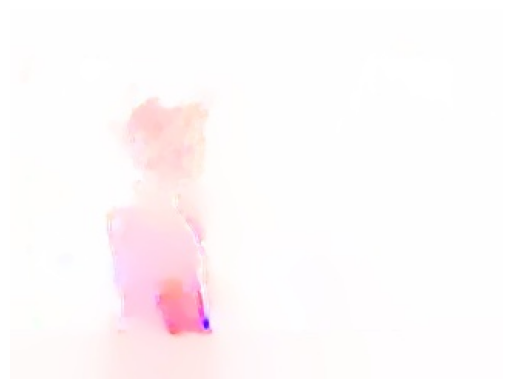

In [40]:
image1=cv2.imread("v_WallPushups_g01_c01-Copy1.avi_00008.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis("off")
plt.imshow(image1)
image1 = np.array(image1, dtype='float32')

type(image1)
bar=histImage(image1)

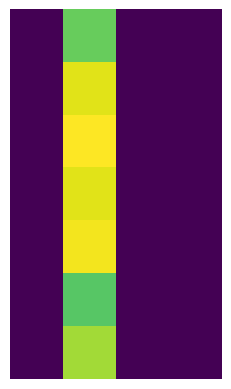

In [41]:
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()